In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [8]:
data = pd.read_excel(r'C:\Users\LGPC\Desktop\kawaba prediction.xlsx')

In [9]:
data.head()

,date,Number of visitor,Snow,Sunny Hours,Corona Infection,Temperature,Holiday Rank
0,2019-01-01,1171,0,9.2,0,4.4,2400
1,2019-01-02,2158,0,7.8,0,4.7,3000
2,2019-01-03,2422,0,7.0,0,3.0,3000
3,2019-01-04,2730,0,9.3,0,4.2,3000
4,2019-01-05,2500,0,8.5,0,6.1,3000


In [10]:
X_train=data.drop(['Number of visitor','date'],axis=1).values
y_train=data['Number of visitor'].values

In [11]:
b_init = 451.2653
w_init = np.array([ -29, 17.86, 0.29, -69, 77.08])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (5,), b_init type: <class 'float'>


In [12]:
def compute_cost(X, y, w, b): 

    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [13]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 7443872165.420729


In [14]:
def compute_gradient(X, y, w, b): 
 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw


In [15]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)

In [16]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
 
    J_history = []
    w = w_in 
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i == 100000:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [19]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 2000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")



b,w found by gradient descent: 0.02,[ 0.00439533  0.37642872  0.20120662 -0.96673192  0.88627269] 
prediction: 2126.29, target value: 1171
prediction: 2657.23, target value: 2158
prediction: 2658.58, target value: 2422
prediction: 2658.28, target value: 2730
prediction: 2656.14, target value: 2500
prediction: 2125.90, target value: 1879
prediction: 708.76, target value: 601
prediction: 708.12, target value: 531
prediction: 709.16, target value: 443
prediction: 708.85, target value: 554
prediction: 707.34, target value: 450
prediction: 2125.18, target value: 2442
prediction: 2657.26, target value: 3948
prediction: 2126.52, target value: 2104
prediction: 707.15, target value: 870
prediction: 707.40, target value: 620
prediction: 707.68, target value: 854
prediction: 708.98, target value: 548
prediction: 2125.73, target value: 2482
prediction: 2123.25, target value: 2909
prediction: 709.37, target value: 654
prediction: 708.57, target value: 709
prediction: 708.79, target value: 820
predi

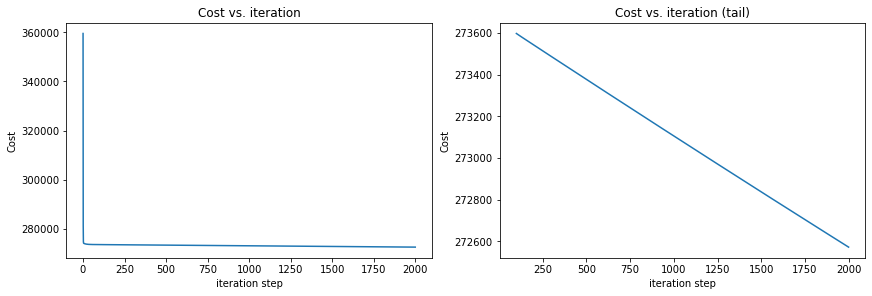

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()